In [28]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [10]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

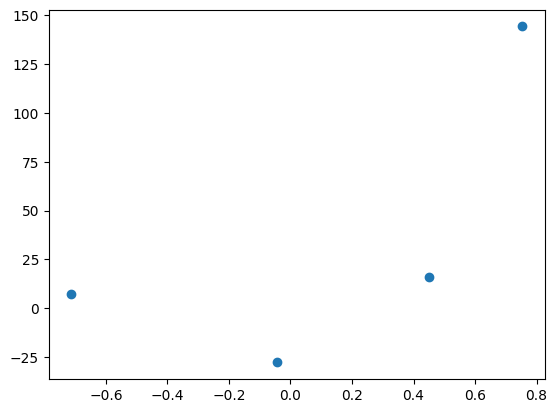

In [13]:
plt.scatter(x,y)
plt.show()

In [15]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [16]:
reg.coef_

array([78.35063668])

In [17]:
reg.intercept_

np.float64(26.15963284313262)

In [18]:
reg.predict(x)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [19]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [21]:
x

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

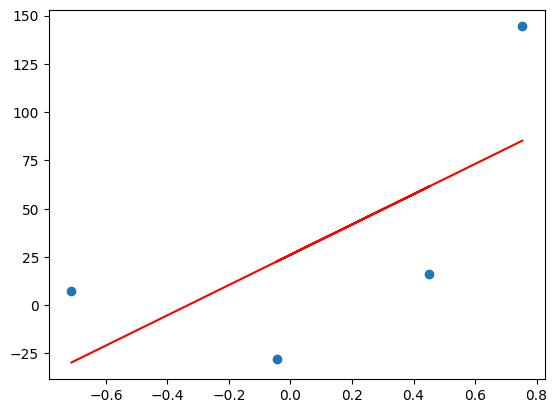

In [20]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='r')

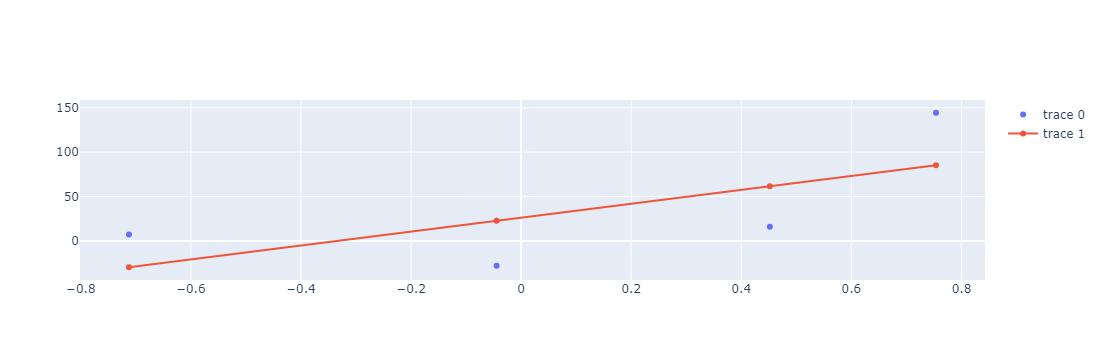

In [64]:
df = pd.DataFrame(x,columns = ['x'])
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['x'],y=y,mode = 'markers'))
fig.add_trace(go.Scatter(x = df['x'],y=reg.predict(x),mode = 'markers+lines'))

In [131]:
y_pre = ((78.35*x)+100).ravel()
y_pre

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

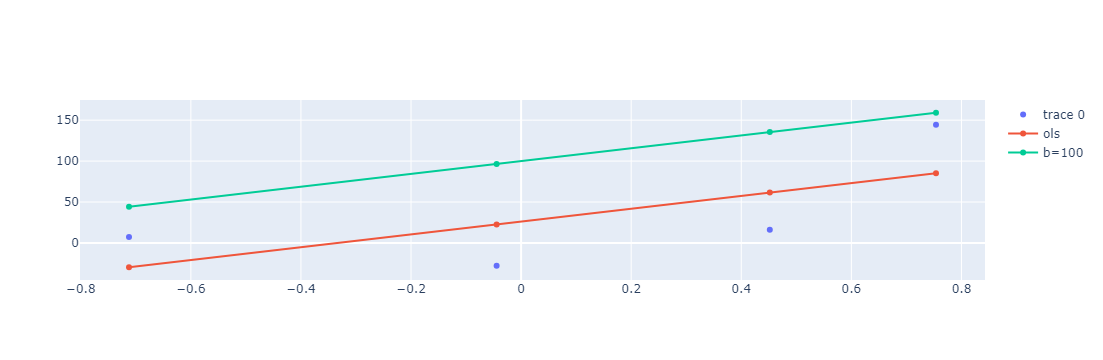

In [133]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x'],y=df['y'],mode = 'markers'))
fig.add_trace(go.Scatter(x=df['x'],y=df['predict'],mode = 'markers+lines',name='ols'))
fig.add_trace(go.Scatter(x=df['x'],y=y_pre,mode = 'markers+lines',name = 'b=100'))

In [134]:
m = 78.35
b= 100
learing_rate = 0.1

loss_slope = -2*np.sum(y - reg.coef_*x.ravel()-b)
b=b - learing_rate*loss_slope
y_pre1 = (reg.coef_*x.ravel()+b)
y_pre1

array([-14.88855566,  76.32749067,  37.44086175,  99.98578195])

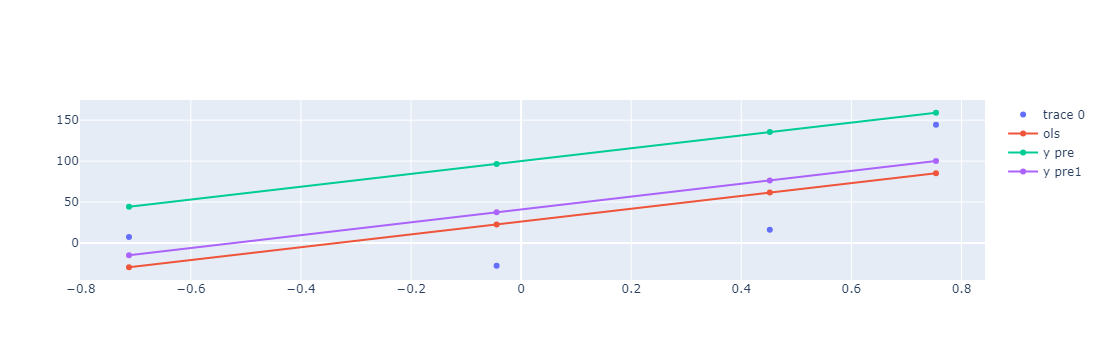

In [135]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.ravel(),y=y,mode = 'markers'))
fig.add_trace(go.Scatter(x=x.ravel(),y=reg.predict(x),mode = 'markers+lines',name = 'ols'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre,mode = 'markers+lines',name = 'y pre'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre1,mode = 'markers+lines',name = 'y pre1'))

In [136]:
loss_slope = -2*np.sum(y-reg.coef_*x.ravel() - b)
b=b - learing_rate*loss_slope
y_pre2 = ((reg.coef_*x.ravel())+b)
y_pre2

array([-26.70301441,  64.51303193,  25.62640301,  88.1713232 ])

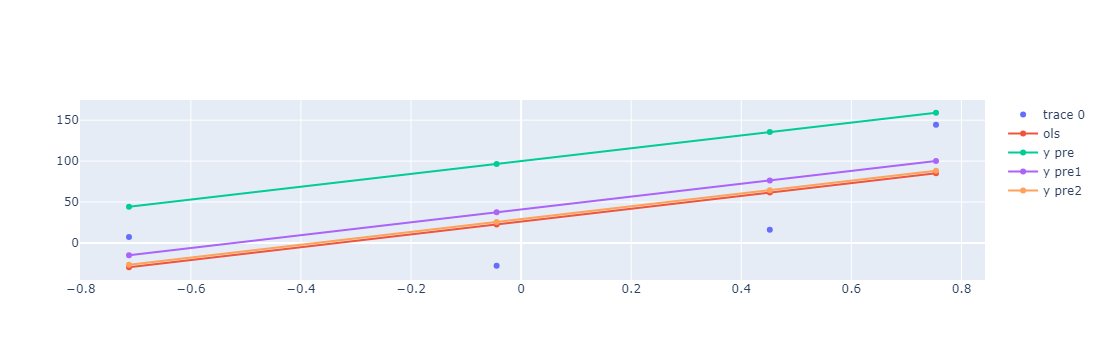

In [137]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.ravel(),y=y,mode = 'markers'))
fig.add_trace(go.Scatter(x=x.ravel(),y=reg.predict(x),mode = 'markers+lines',name = 'ols'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre,mode = 'markers+lines',name = 'y pre'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre1,mode = 'markers+lines',name = 'y pre1'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre2,mode = 'markers+lines',name = 'y pre2'))

In [138]:
loss_slope = -2*np.sum(y-reg.coef_*x.ravel() - b)
b=b - learing_rate*loss_slope
y_pre3 = ((reg.coef_*x.ravel())+b)
y_pre3

array([-29.06590616,  62.15014018,  23.26351126,  85.80843146])

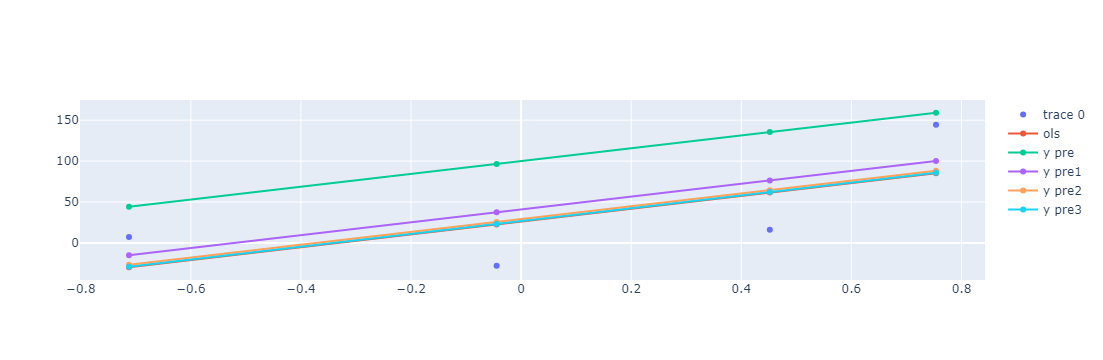

In [139]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.ravel(),y=y,mode = 'markers'))
fig.add_trace(go.Scatter(x=x.ravel(),y=reg.predict(x),mode = 'markers+lines',name = 'ols'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre,mode = 'markers+lines',name = 'y pre'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre1,mode = 'markers+lines',name = 'y pre1'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre2,mode = 'markers+lines',name = 'y pre2'))
fig.add_trace(go.Scatter(x=x.ravel(),y=y_pre3,mode = 'markers+lines',name = 'y pre3'))

In [ ]:
m=78.35
lr = 0.01
b=-100
epochs = 100

fig = go.Figure()
fig.add_trace(go.Scatter(x=x.ravel(),y=y,mode = 'markers'))
fig.add_trace(go.Scatter(x=x.ravel(),y=reg.predict(x),mode = 'markers+lines',name = 'ols'))
for i in range(epochs):
    loss_slope = -2*np.sum(y - m*x.ravel()-b)
    b= b - (lr*loss_slope)
    y_pred = (m*x)+b
    fig.add_trace(go.Scatter(x=x.ravel(),y=y_pred.ravel(),mode = 'markers+lines',name =f'y pred {i}'))
fig.show()
    

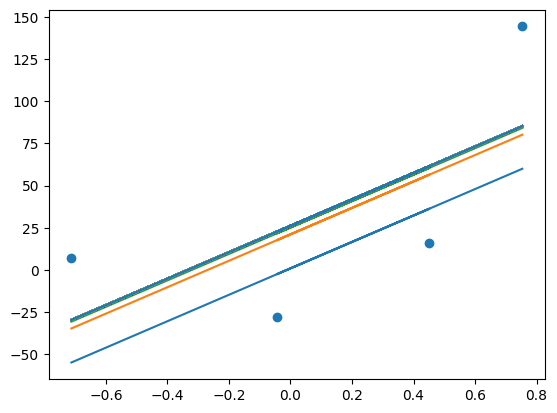

In [168]:
b = -100
m = 78.35
lr = 0.1

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*x.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),label = 'ols')